___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from ipywidgets import interact

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
soldiers_male_url = "https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr"
soldiers_female_url = "https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq"

In [ ]:
male = pd.read_csv(soldiers_male_url, encoding="ISO-8859-1")
female = pd.read_csv(soldiers_female_url, encoding="ISO-8859-1")


In [ ]:
# soldiers_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="'ISO-8859-1'")
# soldiers_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="'ISO-8859-1'")


In [ ]:
# new_top_data = pd.concat([soldiers_female, soldiers_male], axis=0, ignore_index=True)

In [ ]:
# df0 = new_top_data.copy()

In [ ]:
male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [ ]:
female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [ ]:
# We see that subjectid column is differently named in male and female datasets.
# We will standardize subjectid column name and then concatenate both datasets.

female.rename(columns={"SubjectId":"subjectid"}, inplace=True)
df = pd.concat([female, male], axis=0, ignore_index=True)

# ignore_index=True resets index in the concatanated dataframe

In [ ]:
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [ ]:
# let's create a copy f the concatenated dataframe
df0 = df.copy()

In [ ]:
df.shape

(6068, 108)

In [ ]:
df.info(verbose=True)

# verbose=True is required to see info on all features where we have quite a many of them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Ethnicity                         4647
subjectid                            0
radialestylionlength                 0
thighcircumference                   0
tenthribheight                       0
suprasternaleheight                  0
stature                              0
span                                 0
sleeveoutseam                        0
sleevelengthspinewrist               0
sittingheight                        0
shoulderlength                       0
shoulderelbowlength                  0
shouldercircumference                0
poplitealheight                      0
thumbtipreach                        0
palmlength                           0
overheadfingertipreachsitting        0
neckcircumferencebase                0
neckcircumference                    0
mentonsellionlength                  0
lowerthighcircumference              0
lateralmalleolusheight               0
lateralfemoralepicondyleheight       0
kneeheightsitting                    0
kneeheightmidpatella     

In [ ]:
# Check for duplicates to see there are none

df.duplicated().sum()

0

## Explore Data

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
df = df.drop(["subjectid", "SubjectNumericRace",  "Ethnicity"
                  , "Date",  "Installation"  ,"PrimaryMOS" ,"Heightin"
                  ,"Weightlbs", "Component" , "Branch" , "Age"
                  ,"WritingPreference"],axis=1)

In [ ]:
# Target Feature Exploration
df["DODRace"].value_counts(dropna=False)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [ ]:
# We drop race categories that have less than 500 observations

value_counts = df["DODRace"].value_counts(dropna=False)
filtered_value_counts = value_counts[value_counts >= 500]

valid_indices = filtered_value_counts.index

df = df[df["DODRace"].isin(valid_indices)]


In [ ]:
df.shape

(5769, 96)

In [ ]:
df["DODRace"].value_counts(dropna=False)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [ ]:
df['DODRace'] = df['DODRace'].map({
1:'White', 2:'Black', 3:'Hispanic'})

In [ ]:
df['DODRace'].value_counts(dropna=False)

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   int64

In [ ]:
df["SubjectsBirthLocation"].value_counts(dropna=False)

SubjectsBirthLocation
California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
Florida                   210
Oklahoma                  205
Michigan                  194
Minnesota                 194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
Puerto Rico                88
New Jersey                 88
Missouri                   83
Maryland                   78
Colorado                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota      

In [ ]:
#country_to_continent = {
#    "Canada": "North America",
#    "Mexico": "North America",
#    "Germany": "Europe",
#    "India": "Asia",
#    "Puerto Rico": "North America",
#    "New Jersey": "North America",
#    "Mexico": "North America",
#    "Jamaica": "North America",
#    "Dominican Republic": "North America",
#    "Colombia": "South America",
#    "United Kingdom": "Europe",
#    "Panama": "North America",
#    "Peru": "South America",
#    "Guyana": "South America",
#    "Russia": "Europe",
#    "US Virgin Islands": "North America",
#    "Wyoming": "North America",
#    "Alaska": "North America",
#    "Japan": "Asia",
#    "Trinidad and Tobago": "North America",
#    "Ukraine": "Europe",
#    "Liberia": "Africa",
#    "Ecuador": "South America",
#    "Barbados": "North America",
#    "Poland": "Europe",
#    "El Salvador": "North America",
#    "Philippines": "Asia",
#    "Honduras": "North America",
#    "Grenada": "North America",
#    "Nicaragua": "North America",
#    "South Africa": "Africa",
#    "Cuba": "North America",
#    "Nigeria": "Africa",
#    "Portugal": "Europe",
#    "Romania": "Europe",
#    "Guam": "North America",
#    "Belgium": "Europe",
#    "France": "Europe",
#    "Kenya": "Africa",
#    "Morocco": "Africa",
#    "Israel": "Asia",
#    "Ghana": "Africa",
#    "Turkey": "Asia",
#    "Sudan": "Africa",
#    "Netherlands": "Europe",
#    "Belize": "North America",
#    "Italy": "Europe",
#    "Sierra Leone": "Africa",
#    "Lebanon": "Asia",
#    "Antigua and Barbuda": "North America",
#    "Iraq": "Asia",
#    "Bolivia": "South America",
#    "Costa Rica": "North America",
#    "Cameroon": "Africa",
#    "Senegal": "Africa",
#    "Guadalupe": "North America",
#    "Syria": "Asia",
#    "Brazil": "South America",
#    "Cape Verde": "Africa",
#    "Togo": "Africa",
#    "New Zealand": "Oceania",
#    "Belarus": "Europe",
#    "Ivory Coast": "Africa",
#    "Ethiopia": "Africa",
#    "Egypt": "Africa",
#    "French Guiana": "South America",
#    "Iran": "Asia",
#    "Bahamas": "North America",
#    "Chile": "South America",
#    "Serbia": "Europe",
#    "Dominica": "North America",
#    "Saint Lucia": "North America",
#    "Zambia": "Africa",
#    "Argentina": "South America",
#    "Iceland": "Europe",
#    "Paraguay": "South America",
#    "Bulgaria": "Europe",
#    "British Virgin Islands": "North America",
#    "Sri Lanka": "Asia",
#    "Azerbaijan": "Asia",
#    "Venezuela": "South America",
#    "Bosnia and Herzegovina": "Europe",
#    "Bermuda": "North America",
#    "Denmark": "Europe",
#    "South Korea": "Asia",
#    "Guatemala": "North America"
#}
#df['BirthLocation'] = df['SubjectsBirthLocation'].map(country_to_continent).fillna(df['SubjectsBirthLocation'])

In [ ]:
#df['BirthLocation'].value_counts(dropna=False)

In [ ]:
#df['BirthLocation'].isnull().sum()

In [ ]:
#Create a mapping dictionary for US states and their regions

continent_region = {
    'California': 'West',
    'New York': 'Northeast',
    'Texas': 'South',
    'Indiana': 'Midwest',
    'Oklahoma': 'South',
    'Illinois': 'Midwest',
    'Florida': 'South',
    'Minnesota': 'Midwest',
    'Michigan': 'Midwest',
    'Mississippi': 'South',
    'Georgia': 'South',
    'Alabama': 'South',
    'South Carolina': 'South',
    'North Carolina': 'South',
    'Ohio': 'Midwest',
    'Louisiana': 'South',
    'Pennsylvania': 'Northeast',
    'Virginia': 'South',
    'Massachusetts': 'Northeast',
    'Wisconsin': 'Midwest',
    'New Jersey': 'Northeast',
    'Puerto Rico': 'Other',
    'Arizona': 'West',
    'Missouri': 'Midwest',
    'Colorado': 'West',
    'Maryland': 'South',
    'Tennessee': 'South',
    'Kentucky': 'South',
    'Washington': 'West',
    'Kansas': 'Midwest',
    'South Dakota': 'Midwest',
    'Iowa': 'Midwest',
    'Arkansas': 'South',
    'Oregon': 'West',
    'Connecticut': 'Northeast',
    'Jamaica': 'Other',
    'South Korea': 'Other',
    'Nebraska': 'Midwest',
    'Hawaii': 'West',
    'Utah': 'West',
    'West Virginia': 'South',
    'Nevada': 'West',
    'Idaho': 'West',
    'Rhode Island': 'Northeast',
    'District of Columbia': 'South',
    'North Dakota': 'Midwest',
    'Maine': 'Northeast',
    'Delaware': 'South',
    'Dominican Republic': 'Other',
    'New Mexico': 'West',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Vietnam': 'Other',
    'Colombia': 'Other',
    'Haiti': 'Other',
    'Montana': 'West',
    'Japan': 'Other',
    'United Kingdom': 'Other',
    'Panama': 'Other',
    'Guam': 'Other',
    'Guyana': 'Other',
    'Canada': 'Other',
    'Alaska': 'West',
    'Russia': 'Other',
    'Peru': 'Other',
    'China': 'Other',
    'American Samoa': 'Other',
    'Wyoming': 'West',
    'US Virgin Islands': 'Other',
    'Ukraine': 'Other',
    'Trinidad and Tobago': 'Other',
    'India': 'Other',
    'Liberia': 'Other',
    'Ecuador': 'Other',
    'El Salvador': 'Other',
    'Poland': 'Other',
    'Barbados': 'Other',
    'Grenada': 'Other',
    'Honduras': 'Other',
    'Thailand': 'Other',
    'South Africa': 'Other',
    'Nigeria': 'Other',
    'Portugal': 'Other',
    'Nicaragua': 'Other',
    'Cuba': 'Other',
    'Romania': 'Other',
    'Israel': 'Other',
    'Laos': 'Other',
    'Belgium': 'Other',
    'Morocco': 'Other',
    'Kenya': 'Other',
    'France': 'Other',
    'Nepal': 'Other',
    'United States': 'Other',
    'Turkey': 'Other',
    'Sudan': 'Other',
    'Antigua and Barbuda': 'Other',
    'Ghana': 'Other',
    'Netherlands': 'Other',
    'Belize': 'Other',
    'Taiwan': 'Other',
    'Italy': 'Other',
    'Iraq': 'Other',
    'Burma': 'Other',
    'Micronesia': 'Other',
    'Lebanon': 'Other',
    'Bolivia': 'Other',
    'Iceland': 'Other',
    'Sierra Leone': 'Other',
    'Costa Rica': 'Other',
    'Palau': 'Other',
    'Cameroon': 'Other',
    'Zambia': 'Other',
    'Paraguay': 'Other',
    'Serbia': 'Other',
    'Chile': 'Other',
    'Sri Lanka': 'Other',
    'Bulgaria': 'Other',
    'Korea': 'Other',
    'Saint Lucia': 'Other',
    'Bangladesh': 'Other',
    'Azerbaijan': 'Other',
    'Venezuela': 'Other',
    'Fiji': 'Other',
    'Northern Mariana Islands': 'Other',
    'Iran': 'Other',
    'Bosnia and Herzegovina': 'Other',
    'Bermuda': 'Other',
    'Dominica': 'Other',
    'Cambodia': 'Other',
    'Argentina': 'Other',
    'British Virgin Islands': 'Other',
    'Guadalupe': 'Other',
    'Bahamas': 'Other',
    'Senegal': 'Other',
    'Brazil': 'Other',
    'Cape Verde': 'Other',
    'Syria': 'Other',
    'Singapore': 'Other',
    'French Guiana': 'Other',
    'Guatemala': 'Other',
    'Ethiopia': 'Other',
    'Egypt': 'Other',
    'Togo': 'Other',
    'Ivory Coast': 'Other',
    'Belarus': 'Other',
    'New Zealand': 'Other',
    'South America': 'Other',
    'Denmark': 'Other',
    'Puerto Rico': 'North America',
    'Jamaica': 'North America',
    'South Korea': 'Asia',
    'Dominican Republic': 'North America',
    'Vietnam': 'Asia',
    'Colombia': 'South America',
    'Haiti': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Panama': 'North America',
    'Guam': 'Oceania',
    'Guyana': 'South America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Russia': 'Europe',
    'Peru': 'South America',
    'China': 'Asia',
    'American Samoa': 'Oceania',
    'US Virgin Islands': 'North America',
    'Ukraine': 'Europe',
    'Trinidad and Tobago': 'North America',
    'India': 'Asia',
    'Liberia': 'Africa',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'Poland': 'Europe',
    'Barbados': 'North America',
    'Grenada': 'North America',
    'Honduras': 'North America',
    'Thailand': 'Asia',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Portugal': 'Europe',
    'Nicaragua': 'North America',
    'Cuba': 'North America',
    'Romania': 'Europe',
    'Israel': 'Asia',
    'Laos': 'Asia',
    'Germany': 'Europe',
    'Belgium': 'Europe',
    'Morocco': 'Africa',
    'Kenya': 'Africa',
    'France': 'Europe',
    'Nepal': 'Asia',
    'United States': 'North America',
    'Turkey': 'Asia',
    'Sudan': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Ghana': 'Africa',
    'Netherlands': 'Europe',
    'Belize': 'North America',
    'Taiwan': 'Asia',
    'Italy': 'Europe',
    'Iraq': 'Asia',
    'Burma': 'Asia',
    'Micronesia': 'Oceania',
    'Lebanon': 'Asia',
    'Bolivia': 'South America',
    'Iceland': 'Europe',
    'Sierra Leone': 'Africa',
    'Costa Rica': 'North America',
    'Palau': 'Oceania',
    'Cameroon': 'Africa',
    'Zambia': 'Africa',
    'Paraguay': 'South America',
    'Serbia': 'Europe',
    'Chile': 'South America',
    'Sri Lanka': 'Asia',
    'Bulgaria': 'Europe',
    'Korea': 'Asia',
    'Saint Lucia': 'North America',
    'Bangladesh': 'Asia',
    'Azerbaijan': 'Asia',
    'Philippines' : 'Asia',
    'Venezuela': 'South America',
    'Fiji': 'Oceania',
    'Northern Mariana Islands': 'Oceania',
    'Iran': 'Asia',
    'Bosnia and Herzegovina': 'Europe',
    'Bermuda': 'North America',
    'Dominica': 'North America',
    'Cambodia': 'Asia',
    'Argentina': 'South America',
    'British Virgin Islands': 'North America',
    'Guadalupe': 'North America',
    'Bahamas': 'North America',
    'Senegal': 'Africa',
    'Brazil': 'South America',
    'Cape Verde': 'Africa',
    'Syria': 'Asia',
    'Singapore': 'Asia',
    'French Guiana': 'South America',
    'Guatemala': 'North America',
    'Ethiopia': 'Africa',
    'Egypt': 'Africa',
    'Togo': 'Africa',
    'Ivory Coast': 'Africa',
    'Belarus': 'Europe',
    'New Zealand': 'Oceania',
    'South America': 'South America',
    'Denmark': 'Europe'
}

#Create a new variable 'RegionOrContinent' based on the mapping
df['RegionOrContinent'] = df['SubjectsBirthLocation'].map(continent_region)

In [ ]:
df['RegionOrContinent'].value_counts(dropna=False)

RegionOrContinent
South            2215
Midwest          1401
Northeast         837
West              799
North America     264
Europe            144
South America      43
Africa             35
Asia               27
Oceania             4
Name: count, dtype: int64

In [ ]:
df[df["RegionOrContinent"].isnull()]['SubjectsBirthLocation']

Series([], Name: SubjectsBirthLocation, dtype: object)

In [ ]:
df = df.drop('SubjectsBirthLocation', axis=1)

In [ ]:
pd.set_option('display.max_rows', None)
df.describe().T

count         mean         std     min     25%     50%     75%     max
abdominalextensiondepthsitting  5769.0   247.254290   37.457748   155.0   220.0   243.0   272.0   451.0
acromialheight                  5769.0  1408.630265   78.303123  1146.0  1353.0  1412.0  1464.0  1683.0
acromionradialelength           5769.0   328.071590   20.444554   249.0   314.0   328.0   342.0   393.0
anklecircumference              5769.0   225.201768   15.965783   156.0   214.0   225.0   235.0   293.0
axillaheight                    5769.0  1301.902583   71.260913  1062.0  1252.0  1304.0  1351.0  1553.0
balloffootcircumference         5769.0   244.408043   16.803556   186.0   233.0   245.0   256.0   306.0
balloffootlength                5769.0   195.118911   13.379000   151.0   186.0   196.0   205.0   245.0
biacromialbreadth               5769.0   399.706015   30.124094   283.0   377.0   404.0   422.0   489.0
bicepscircumferenceflexed       5769.0   341.663027   41.270615   216.0   312.0   342.0   370.0   490.0
bicristalbreadth                5769.0   274.903449   19.239580   197.0   262.0   274.0   288.0   362.0
bideltoidbreadth                5769.0   491.454845   42.011888   357.0   461.0   493.0   520.0   637.0
bimalleolarbreadth              5769.0    72.335413    5.326965    55.0    68.0    73.0    76.0    91.0
bitragionchinarc                5769.0   324.962212   17.050426   267.0   314.0   326.0   336.0   385.0
bitragionsubmandibulararc       5769.0   306.677760   20.818789   245.0   292.0   307.0   321.0   390.0
bizygomaticbreadth              5769.0   139.529381    7.248670   116.0   134.0   140.0   145.0   166.0
buttockcircumference            5769.0  1022.059456   75.952953   737.0   970.0  1019.0  1071.0  1341.0
buttockdepth                    5769.0   242.234356   26.409001   168.0   223.0   241.0   259.0   349.0
buttockheight                   5769.0   872.112845   54.064846   656.0   834.0   870.0   908.0  1080.0
buttockkneelength               5769.0   610.449991   33.120828   479.0   587.0   610.0   633.0   736.0
buttockpopliteallength          5769.0   498.331773   28.512562   380.0   478.0   498.0   518.0   605.0
calfcircumference               5769.0   386.316519   30.577787   266.0   365.0   385.0   406.0   523.0
cervicaleheight                 5769.0  1479.952158   83.590746  1208.0  1421.0  1487.0  1539.0  1738.0
chestbreadth                    5769.0   283.232623   20.612214   213.0   269.0   283.0   297.0   363.0
chestcircumference              5769.0  1024.206622  100.375776   695.0   952.0  1023.0  1093.0  1469.0
chestdepth                      5769.0   252.322586   26.660255   170.0   234.0   251.0   270.0   383.0
chestheight                     5769.0  1254.290172   78.882449  1000.0  1199.0  1261.0  1310.0  1506.0
crotchheight                    5769.0   827.105738   54.056267   610.0   789.0   827.0   864.0  1031.0
crotchlengthomphalion           5769.0   622.693708   45.087220   473.0   592.0   621.0   652.0   799.0
crotchlengthposterioromphalion  5769.0   351.880222   29.807293   243.0   331.0   351.0   372.0   468.0
earbreadth                      5769.0    35.175420    3.221118    25.0    33.0    35.0    37.0    46.0
earlength                       5769.0    62.606171    4.861629    46.0    59.0    62.0    66.0    81.0
earprotrusion                   5769.0    22.227249    3.149012    13.0    20.0    22.0    24.0    34.0
elbowrestheight                 5769.0   240.553302   28.595503   138.0   222.0   241.0   260.0   345.0
eyeheightsitting                5769.0   786.399203   41.843182   654.0   757.0   788.0   816.0   912.0
footbreadthhorizontal           5769.0    98.915063    6.658949    77.0    94.0    99.0   104.0   126.0
footlength                      5769.0   263.512394   17.231642   210.0   252.0   265.0   276.0   323.0
forearmcenterofgriplength       5769.0   339.458832   23.081597   258.0   323.0   341.0   356.0   416.0
forearmcircumferenceflexed      5769.0   295.661640   29.857253   200.0   273.0  

In [ ]:
# let's reset our index
df.reset_index(drop=True, inplace=True)

In [ ]:
figure_columns = df.select_dtypes(include='number').columns.tolist()

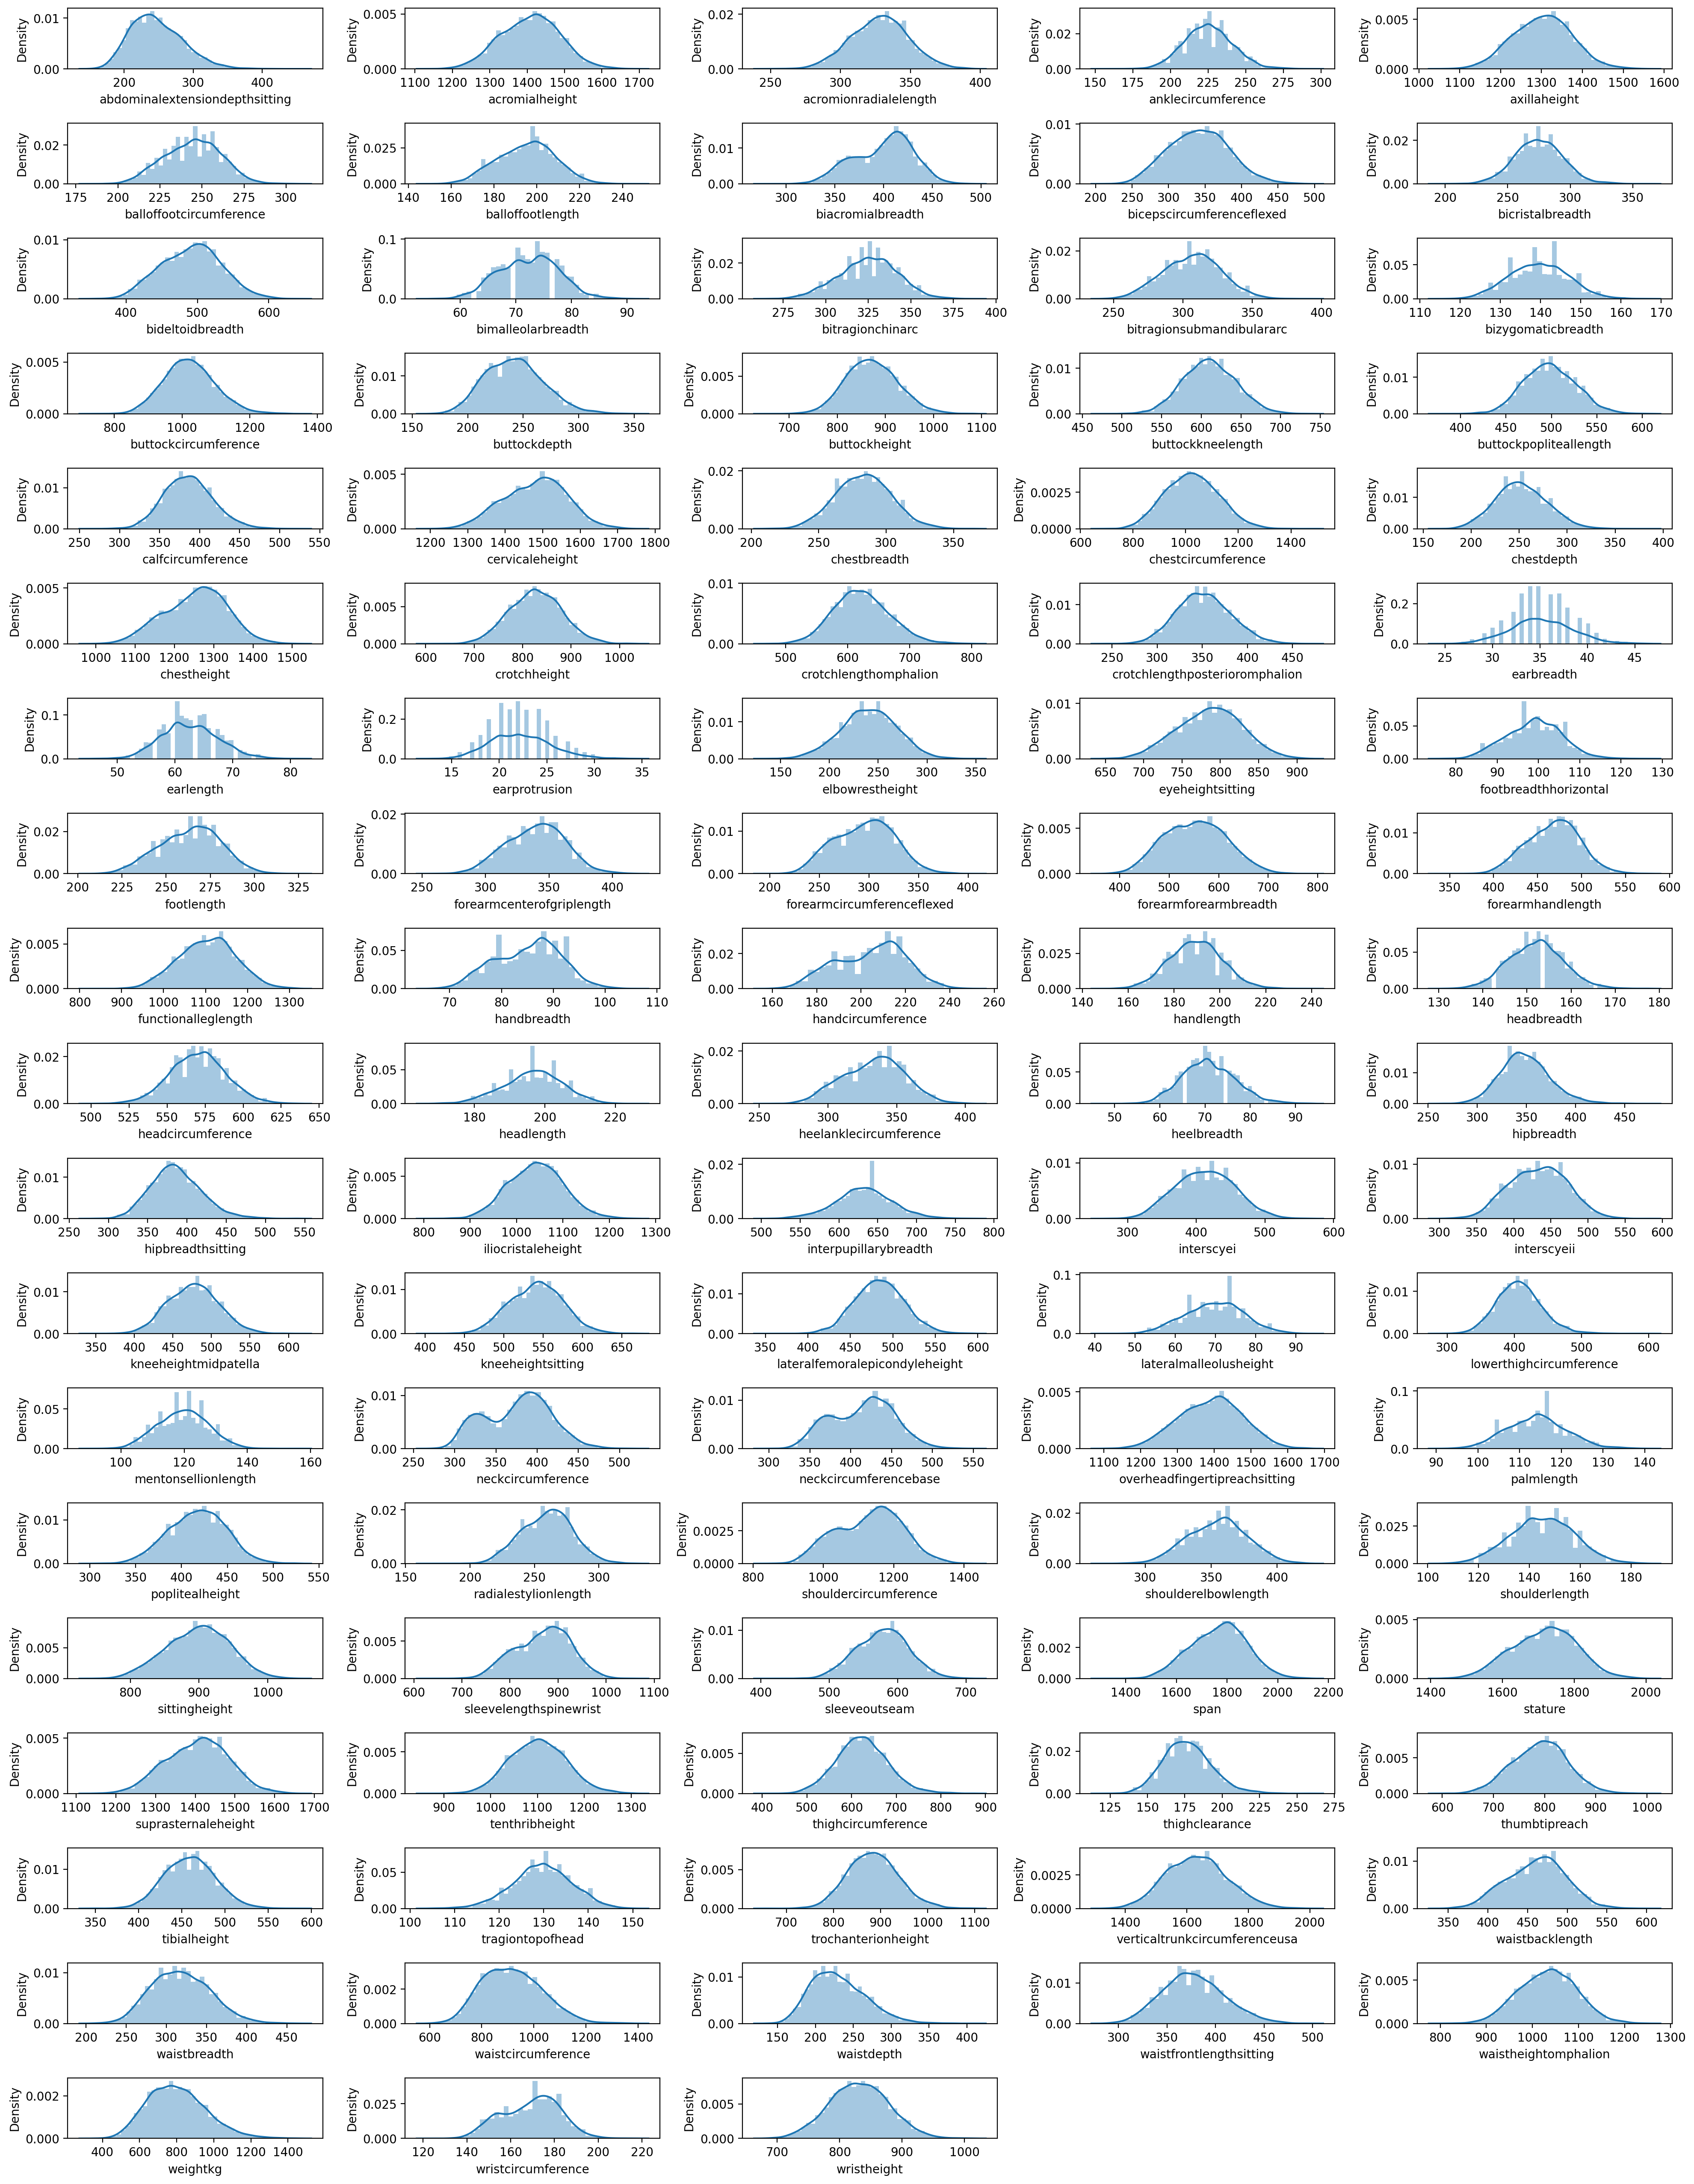

In [ ]:
# Distribution of the numericalfeatures

fig = plt.figure(figsize=(20,40), dpi=200)
for i, col in enumerate(figure_columns):
        plt.subplot(30,5,i+1)
        sns.distplot(df[col],)
plt.tight_layout();


#seems mostly normally distributed

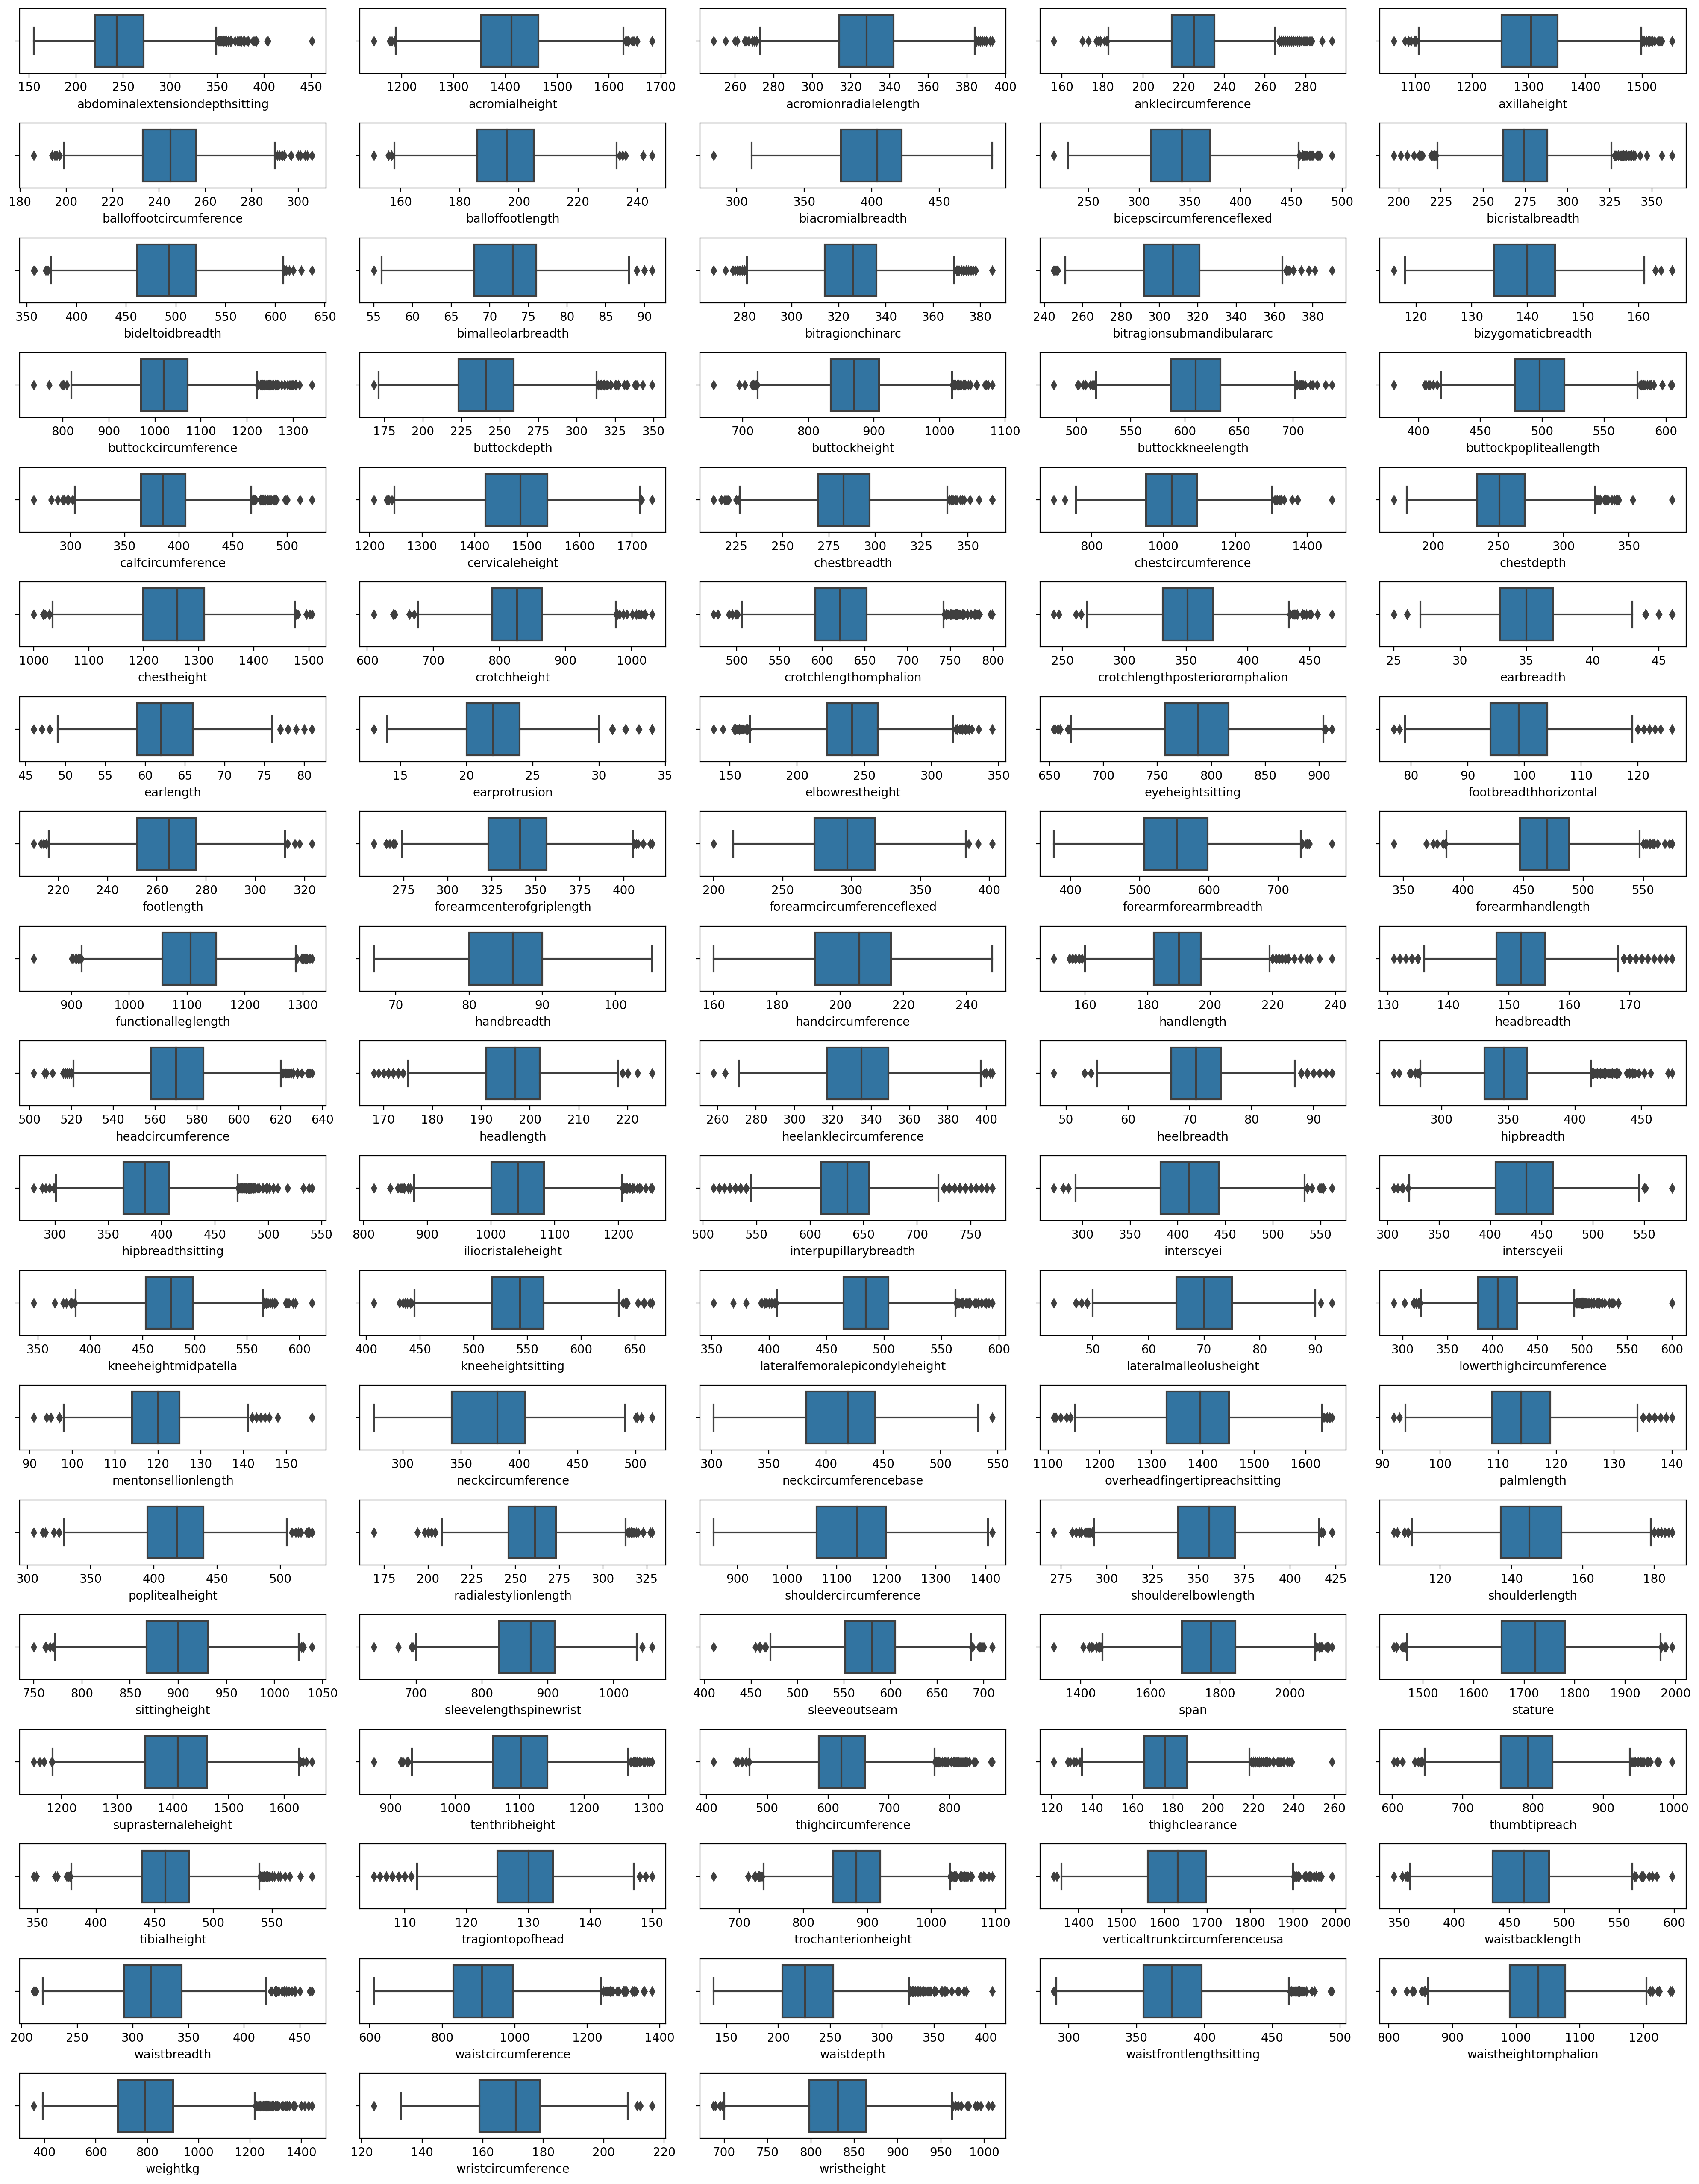

In [ ]:
# Distribution of the numericalfeatures via box plots

fig = plt.figure(figsize=(20,40), dpi=200)
for i, col in enumerate(figure_columns):
        plt.subplot(30,5,i+1)
        sns.boxplot(x = df[col])
plt.tight_layout();

In [ ]:
def column_box(col):
    sns.boxplot(data = df,
                y= df[col],
                x=df["DODRace"],
                palette='Dark2')
cols = figure_columns
interact(column_box, col=cols);

interactive(children=(Dropdown(description='col', options=('abdominalextensiondepthsitting', 'acromialheight',…

In [ ]:
#showing how the features separate DODRace
def column_pair(col1,col2):
    sns.pairplot(df,
                 vars=[col1,col2],
                 hue="DODRace",
                 height= 2,
                 aspect= 2,
                 palette='Dark2')
cols1 = figure_columns
cols2 = figure_columns
interact(column_pair, col1=cols1, col2=cols2);

interactive(children=(Dropdown(description='col1', options=('abdominalextensiondepthsitting', 'acromialheight'…

In [ ]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction

def detect_outliers(df, col_name,tukey=1.5):
    '''
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile

    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0

    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
threshold = 1.5
out_cols = []
for col in figure_columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)

abdominalextensiondepthsitting
lower:142.0 
upper:350.0        
outlier:46
*-*-*-*-*-*-*
acromialheight
lower:1186.5 
upper:1630.5        
outlier:14
*-*-*-*-*-*-*
acromionradialelength
lower:272.0 
upper:384.0        
outlier:31
*-*-*-*-*-*-*
anklecircumference
lower:182.5 
upper:266.5        
outlier:73
*-*-*-*-*-*-*
axillaheight
lower:1103.5 
upper:1499.5        
outlier:27
*-*-*-*-*-*-*
balloffootcircumference
lower:198.5 
upper:290.5        
outlier:23
*-*-*-*-*-*-*
balloffootlength
lower:157.5 
upper:233.5        
outlier:11
*-*-*-*-*-*-*
biacromialbreadth
lower:309.5 
upper:489.5        
outlier:1
*-*-*-*-*-*-*
bicepscircumferenceflexed
lower:225.0 
upper:457.0        
outlier:19
*-*-*-*-*-*-*
bicristalbreadth
lower:223.0 
upper:327.0        
outlier:57
*-*-*-*-*-*-*
bideltoidbreadth
lower:372.5 
upper:608.5        
outlier:12
*-*-*-*-*-*-*
bimalleolarbreadth
lower:56.0 
upper:88.0        
outlier:6
*-*-*-*-*-*-*
bitragionchinarc
lower:281.0 
upper:369.0        
outlier:46
*-*-*

In [ ]:
##We have decided to drop outliers over 1,5 iqr
#for col in out_cols:
#    df = df[(df[col] > detect_outliers(df, col)[0])
#             & (df[col] < detect_outliers(df, col)[1])]

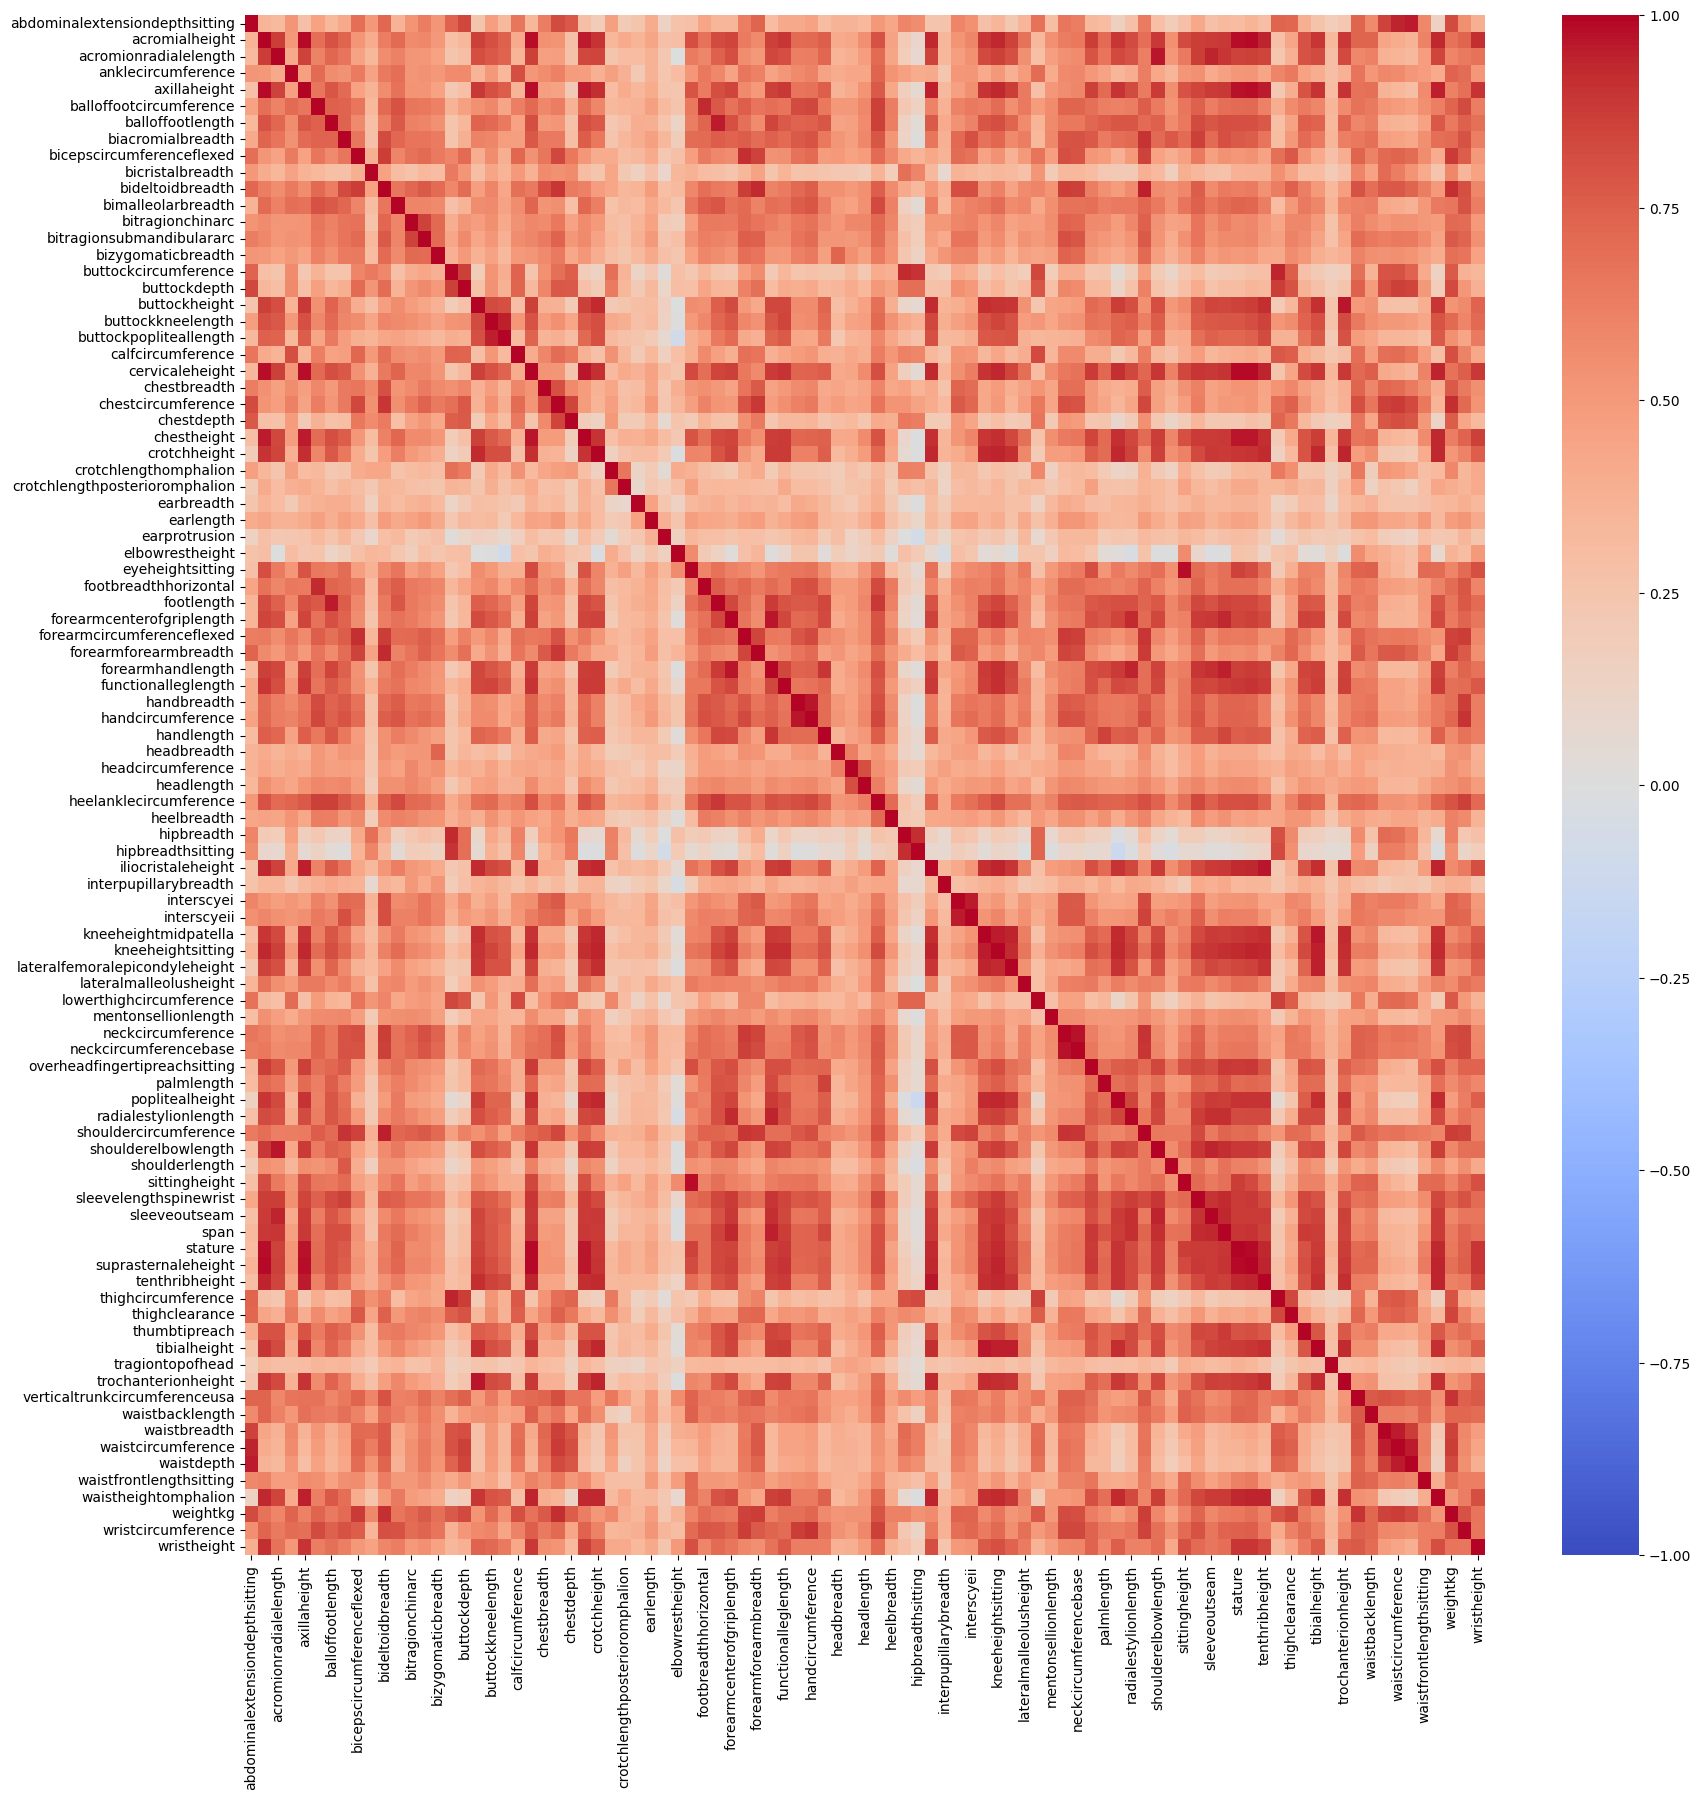

In [ ]:
# Let's check bivariate correlations among numerical features

plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes("number").corr(),vmin=-1, vmax=1, cmap ="coolwarm");

# we do have multicollinearity in our data, which logistic regression and other non-parametric algorithms we will be using can handle

In [ ]:
df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3                             261            1356                    306           

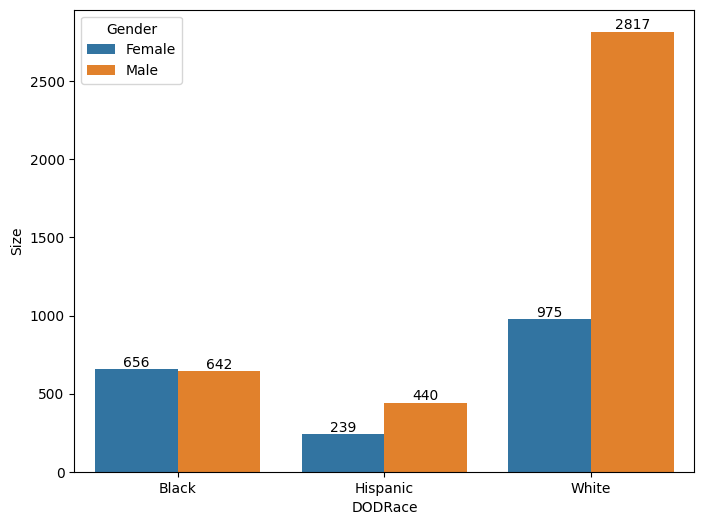

In [ ]:
class_digit = df.groupby(['DODRace', 'Gender']).size()
class_label = pd.DataFrame(class_digit, columns=['Size']).reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='DODRace', y='Size', hue='Gender', data=class_label)
for container in ax.containers:
    ax.bar_label(container)

#Comparing races by gender, Hispanic and White races show unbalanced data where the White being the most unbalanced

In [ ]:
df.to_csv("soldier_race_project_EDA.csv", index = False)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
# !pip install scikit-plot
# !pip install shap

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# import scikitplot
# import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline

# from sklearn.model_selection import train_test_split
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
# from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
# from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV
# from scikitplot.metrics import plot_precision_recall
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.utils.class_weight import compute_class_weight
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
# import shap
# import pickle
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder , StandardScaler
# from sklearn.pipeline import Pipeline
# from yellowbrick.classifier import ClassPredictionError

In [ ]:
#reading the CSV file where EDA part has been done.
df = pd.read_csv("soldier_race_project_EDA.csv")

In [ ]:
#preparing the data for train and test sets
#the target is DODRace
X=df.drop("DODRace", axis=1)
y=df["DODRace"]

In [ ]:
#splitting the sate for train and test(20% of data) sets with stratification

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61, stratify = y)

In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 95)
Train target shape   :  (4615,)
Test features shape  :  (1154, 95)
Test target shape    :  (1154,)


In [ ]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    '''
    Description:
    This function gets a model, train and test sets and return
    the confusion matrix and classification report

    INPUT:
    model - fitted model
    X_train - input features for the training set
    y_train - target values for training set
    X_test - input features for the testing set
    y_test - target values for testing set

    RETURN:
    Nothing

    '''
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # confusion matrix is a table that summarizes the performance of a classification model
    # by showing the counts of true positive, true negative, false positive, and false negative predictions.
    #classification_report generates a report containing various evaluation metrics
    # including precision, recall, F1-score, and support for each class.

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model (using default values)

### Column Transformer

In [ ]:
#listing the categorical columns and removing the Target column (DODrace)
cat = list(df.select_dtypes(include=['object']).columns)
cat.remove('DODRace')
cat

['Gender', 'RegionOrContinent']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False),
                              cat),
                              remainder = MinMaxScaler(),
                              verbose_feature_names_out=False).set_output(transform="pandas")

# make_column_transformer is used to apply different transformations to different columns of a dataset.
#One-hot encoding converts categorical variables into binary vectors. (recommended for parametric and distance-based models)
#The underlying reason that we used OHE is to enforce the data behave to all featrures equally.
#sparse_output= This is an argument passed to the OneHotEncoder transformer to specify whether the output should be sparse or dense.
    #False: OHE'in yaptigi donusumu gormek istemiyoruz
#remainder: specifies how to handle the remaining columns that are not explicitly specified for transformation.
#MinMaxScaler scales numerical features to a specified range (usually between 0 and 1).


In [ ]:
from sklearn.pipeline import Pipeline

operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',
                                         random_state=61))]

pipe_log_model = Pipeline(steps=operations)

# there are two operations to be performed in the pipeline:
#one-hot encoding using the column_trans transformer and logistic regression using the LogisticRegression class.
#log: is a logistic regression model object that is used for binary classification problems.
#weight:balanced, the model will adjust the weights of the classes inversely proportional to their frequencies in the input data.

In [ ]:
pipe_log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', random_state=61))])

In [ ]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

# precision: TP/(TP+FP) Model birseye dogru diyorsa %kacinda hakli (ne kadari gercekten de dogru)
# recall: TP/(TP+FN) Model pozitiflerin %kacini dogru yakalayabildi ()
#cancer etc: yanlis negatifin daha maaliyetli oldugu data setlerinde recall daha fazla onem teskil eder.
#ama yanlış pozitiflerin maliyeti yüksekse (örneğin, bir spam filtresi gibi), precision daha önemli olabilir.

#Hispanic precision score dusuk
#Macro avg basarili

Train_Set
[[ 949   62   27]
 [  33  428   82]
 [  81  359 2594]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90      1038
    Hispanic       0.50      0.79      0.61       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.85      0.81      4615
weighted avg       0.89      0.86      0.87      4615


Test_Set
[[235  17   8]
 [  6  99  31]
 [ 21  96 641]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       260
    Hispanic       0.47      0.73      0.57       136
       White       0.94      0.85      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.84      0.86      1154



In [ ]:
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']

In [ ]:
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',
                                         random_state=61))]

pipe_log_model = Pipeline(steps=operations)

scores = cross_validate(pipe_log_model,
                        X_train,
                        y_train,
                        scoring= scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.848321
train_accuracy           0.861009
test_precision_macro     0.771244
train_precision_macro    0.786395
test_recall_macro        0.832116
train_recall_macro       0.852377
test_f1_macro            0.790129
train_f1_macro           0.808222
dtype: float64

### Logistic Model GridsearchCV

In [ ]:
#class weight is performed with varying weights for the Hispanic class
#in the case of we would like to consider whole races, then, we should remove the customized weights(?)
#C parameter: I added 0.35 (just to see)
#C parametresi ne kadar kucukse regularizasyon kuvveti okadar yuksektir. Bu da varyansi o olcude dusurur.
    #biz recall'un test-train varyansini dusurmek istedigimiz icin kucuk C parametreleri reasonable
# n_jobs=-1 uses all available CPU cores

operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(random_state=61))]

pipe_log_model = Pipeline(steps=operations)

# Parametre ızgarasını belirleyin
log_param_grid = {'log__C': [0.001, 0.01, 0.1, 1],
              'log__class_weight': ['balanced'],
              'log__penalty': ['l1', 'l2'],
              # from docs : For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
              'log__solver': ['liblinear','sag','saga','newton-cg'],
              }

# GridSearchCV'yi kullanarak modeli eğitin
log_grid_model = GridSearchCV(pipe_log_model, param_grid= log_param_grid, cv=10,n_jobs= -1, return_train_score=True)
log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'RegionOrContinent'])],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(random_state=61))]),
             n_jobs=-1,
             param_grid={'log__C': [0.001, 0.01, 0.1, 1],
                         'log__class_weight': ['balanced'],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'sag', 'saga',
                                         'newton-cg']},
             return_train_score=True)

In [ ]:
#accessing the best hyperparameters found during the grid search
log_grid_model.best_params_


{'log__C': 1,
 'log__class_weight': 'balanced',
 'log__penalty': 'l2',
 'log__solver': 'liblinear'}

In [ ]:
#accessing the best-performing estimator or model found during the grid search.
log_grid_model.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=61, solver='liblinear'))])

In [ ]:
pd.DataFrame(log_grid_model.cv_results_).loc[log_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.890787
mean_train_score    0.897123
Name: 28, dtype: object

In [ ]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 949   33   56]
 [  41  327  175]
 [  63  106 2865]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91      1038
    Hispanic       0.70      0.60      0.65       543
       White       0.93      0.94      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.82      0.83      4615
weighted avg       0.89      0.90      0.89      4615


Test_Set
[[238   8  14]
 [  9  71  56]
 [ 24  27 707]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       260
    Hispanic       0.67      0.52      0.59       136
       White       0.91      0.93      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.79      0.80      1154
weighted avg       0.87      0.88      0.88      1154



In [ ]:
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(C=1,
                                         penalty='l2',
                                         solver='liblinear',
                                        class_weight='balanced',
                                         random_state=61))]

pipe_log_model = Pipeline(steps=operations)

scores = cross_validate(pipe_log_model,
                        X_train,
                        y_train,
                        scoring=['accuracy',
                                 'precision_macro', 'recall_macro', 'f1_macro'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.890787
train_accuracy           0.897123
test_precision_macro     0.834320
train_precision_macro    0.842547
test_recall_macro        0.808166
train_recall_macro       0.819039
test_f1_macro            0.818490
train_f1_macro           0.829429
dtype: float64

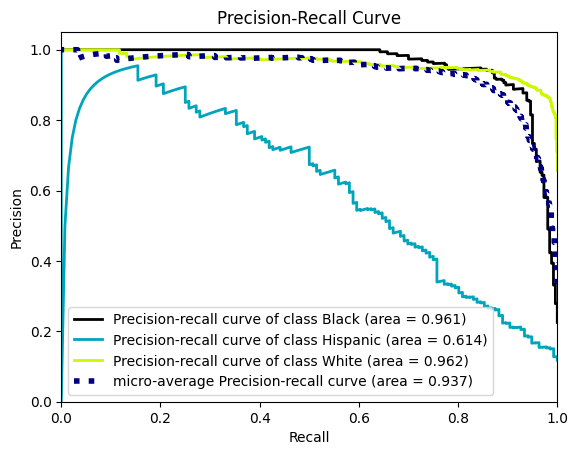

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(C=1,
                                         penalty='l2',
                                         solver='liblinear',
                                        class_weight='balanced',
                                         random_state=61))]

pipe_log_model = Pipeline(steps=operations)

pipe_log_model.fit(X_train, y_train)
y_pred_proba = pipe_log_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 949   33   56]
 [  41  327  175]
 [  63  106 2865]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91      1038
    Hispanic       0.70      0.60      0.65       543
       White       0.93      0.94      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.82      0.83      4615
weighted avg       0.89      0.90      0.89      4615


Test_Set
[[238   8  14]
 [  9  71  56]
 [ 24  27 707]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       260
    Hispanic       0.67      0.52      0.59       136
       White       0.91      0.93      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.79      0.80      1154
weighted avg       0.87      0.88      0.88      1154



In [ ]:
#It seems like we couldn't improve the scores when we customize the weighting paramater by particularly considering the Hispanic class
# It may be worth to remove customization

In [ ]:
pd.get_dummies(y_test).values # average_precision_score da kullanacagiz

array([[ True, False, False],
       [False, False,  True],
       [ True, False, False],
       ...,
       [False, False,  True],
       [ True, False, False],
       [False,  True, False]])

In [ ]:
#karsilastirma yapabilmek icin degiskene atadik
from sklearn.metrics import average_precision_score, precision_score, recall_score
y_test_dummies = pd.get_dummies(y_test).values
y_pred = log_grid_model.predict(X_test)
# Compute macro average precision
log_AP_macro = average_precision_score(y_test_dummies, y_pred_proba, average='macro')
# Compute macro average precision, precision, and recall for the label "Hispanic"
log_precision_macro = precision_score(y_test, y_pred, average='macro', labels=["Hispanic", "Black", "White"])
log_recall_macro = recall_score(y_test, y_pred, average='macro', labels=["Hispanic", "Black", "White"])

In [ ]:
log_recall_macro

0.7900537056714304

## 2. SVC

### Vanilla SVC model

In [ ]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("modelSVM", SVC(class_weight="balanced",random_state=61))]

modelSVM = Pipeline(steps=operations_svc)

In [ ]:
modelSVM.fit(X_train , y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('modelSVM', SVC(class_weight='balanced', random_state=61))])

In [ ]:
eval_metric(modelSVM, X_train, y_train, X_test, y_test)

Train_Set
[[ 964   42   32]
 [  24  441   78]
 [  54  297 2683]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.57      0.81      0.67       543
       White       0.96      0.88      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.82      0.88      0.84      4615
weighted avg       0.91      0.89      0.89      4615


Test_Set
[[228  22  10]
 [  6  94  36]
 [ 21  77 660]]
              precision    recall  f1-score   support

       Black       0.89      0.88      0.89       260
    Hispanic       0.49      0.69      0.57       136
       White       0.93      0.87      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.81      0.79      1154
weighted avg       0.87      0.85      0.86      1154



In [ ]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring= scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.853516
train_accuracy           0.886530
test_precision_macro     0.774623
train_precision_macro    0.818455
test_recall_macro        0.817551
train_recall_macro       0.876265
test_f1_macro            0.789480
train_f1_macro           0.839420
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
operations_svc = [("OneHotEncoder", column_trans),
              ("modelSVM", SVC(class_weight="balanced",random_state=61))]

model = Pipeline(steps=operations_svc)

# Parametre ızgarasını belirleyin
svm_param_grid = {'modelSVM__C': [0.001, 0.01, 0.1, 1],
                'modelSVM__kernel': ['linear', 'rbf'],
                'modelSVM__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
              }

# GridSearchCV'yi kullanarak modeli eğitin
svm_grid_model = GridSearchCV(model, param_grid= svm_param_grid, cv=10, n_jobs=-1, return_train_score=True)
svm_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'RegionOrContinent'])],
                                                          verbose_feature_names_out=False)),
                                       ('modelSVM',
                                        SVC(class_weight='balanced',
                                            random_state=61))]),
             n_jobs=-1,
             param_grid={'modelSVM__C': [0.001, 0.01, 0.1, 1],
                         'modelSVM__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'modelSVM__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [ ]:
svm_grid_model.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('modelSVM',
                 SVC(C=1, class_weight='balanced', random_state=61))])

In [ ]:
svm_grid_model.best_params_

{'modelSVM__C': 1, 'modelSVM__gamma': 'scale', 'modelSVM__kernel': 'rbf'}

In [ ]:
pd.DataFrame(svm_grid_model.cv_results_).loc[svm_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.853516
mean_train_score     0.88653
Name: 31, dtype: object

In [ ]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(C=1,
                              class_weight='balanced',
                              gamma= 'scale',
                              kernel='rbf',
                              random_state=61))]

model = Pipeline(steps=operations_svc)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.853516
train_accuracy           0.886530
test_precision_macro     0.774623
train_precision_macro    0.818455
test_recall_macro        0.817551
train_recall_macro       0.876265
test_f1_macro            0.789480
train_f1_macro           0.839420
dtype: float64

In [ ]:
eval_metric(svm_grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 964   42   32]
 [  24  441   78]
 [  54  297 2683]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.57      0.81      0.67       543
       White       0.96      0.88      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.82      0.88      0.84      4615
weighted avg       0.91      0.89      0.89      4615


Test_Set
[[228  22  10]
 [  6  94  36]
 [ 21  77 660]]
              precision    recall  f1-score   support

       Black       0.89      0.88      0.89       260
    Hispanic       0.49      0.69      0.57       136
       White       0.93      0.87      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.81      0.79      1154
weighted avg       0.87      0.85      0.86      1154



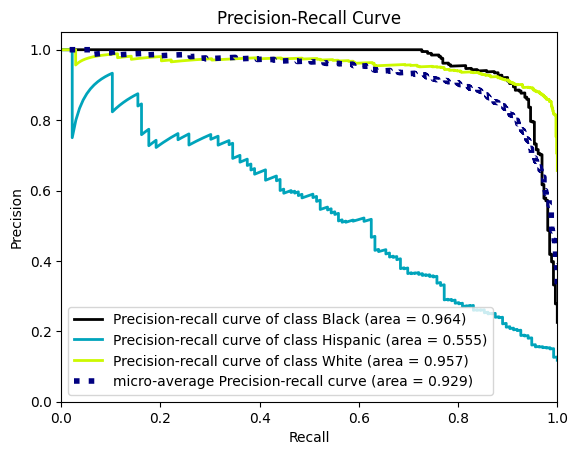

In [ ]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(C=1,
                              class_weight='balanced',
                              gamma= 'scale',
                              kernel='rbf',
                              random_state=61))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [ ]:
decision_function

array([[ 2.87138067, -6.00684416, -0.62079345],
       [-5.15375473,  0.40681877,  1.00914529],
       [ 2.12570082, -1.7233087 , -2.60082035],
       ...,
       [-5.84508849, -2.83298779,  3.83258501],
       [ 3.71356978, -1.43048177, -4.25250441],
       [ 0.67831214, -1.05949985, -1.87381455]])

In [ ]:
#karsilastirma yapabilmek icin degiskene atadik
from sklearn.metrics import average_precision_score, precision_score, recall_score
y_test_dummies = pd.get_dummies(y_test).values
y_pred = svm_grid_model.predict(X_test)
# Compute macro average precision
svm_AP_macro = average_precision_score(y_test_dummies, decision_function, average='macro')
# Compute macro average precision, precision, and recall for the label "Hispanic"
svm_precision_macro = precision_score(y_test, y_pred, average='macro', labels=["Hispanic", "Black", "White"])
svm_recall_macro = recall_score(y_test, y_pred, average='macro', labels=["Hispanic", "Black", "White"])

In [ ]:
svm_recall_macro

0.812937316188907

## 3. RF

In [ ]:
cat

['Gender', 'RegionOrContinent']

In [ ]:
scoring

['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough')

### Vanilla RF Model

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=61))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'RegionOrContinent'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=61))])

In [ ]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615


Test_Set
[[187   1  72]
 [  5   7 124]
 [ 10   3 745]]
              precision    recall  f1-score   support

       Black       0.93      0.72      0.81       260
    Hispanic       0.64      0.05      0.10       136
       White       0.79      0.98      0.88       758

    accuracy                           0.81      1154
   macro avg       0.78      0.58      0.59      1154
weighted avg       0.80      0.81      0.77      1154



In [ ]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=61))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.810622
train_accuracy           0.999952
test_precision_macro     0.847567
train_precision_macro    0.999976
test_recall_macro        0.574965
train_recall_macro       0.999864
test_f1_macro            0.581926
train_f1_macro           0.999919
dtype: float64

### RF Model GridsearchCV

In [ ]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]}
             #'min_samples_split':[20,22,24],
             #'max_features': ['sqrt', 'log2', None, 15, 20]

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=61))]

model = Pipeline(steps=operations_rf)

rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring=scoring,
                             n_jobs=-1,
                             cv=10,
                             return_train_score=True)

In [ ]:
rf_grid_model.fit(X_train,y_train)

ValueError: For multi-metric scoring, the parameter refit must be set to a scorer key or a callable to refit an estimator with the best parameter setting on the whole data and make the best_* attributes available for that metric. If this is not needed, refit should be set to False explicitly. True was passed.

In [ ]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [ ]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [ ]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.605892
mean_train_score    0.646607
Name: 0, dtype: object

In [ ]:
rf_grid_model.best_score_

0.6058922558922559

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[178  57  25]
 [ 12  85  39]
 [ 68 300 390]]
              precision    recall  f1-score   support

       Black       0.69      0.68      0.69       260
    Hispanic       0.19      0.62      0.29       136
       White       0.86      0.51      0.64       758

    accuracy                           0.57      1154
   macro avg       0.58      0.61      0.54      1154
weighted avg       0.74      0.57      0.61      1154


Train_Set
[[ 719  201  118]
 [  43  353  147]
 [ 243 1098 1693]]
              precision    recall  f1-score   support

       Black       0.72      0.69      0.70      1038
    Hispanic       0.21      0.65      0.32       543
       White       0.86      0.56      0.68      3034

    accuracy                           0.60      4615
   macro avg       0.60      0.63      0.57      4615
weighted avg       0.75      0.60      0.64      4615



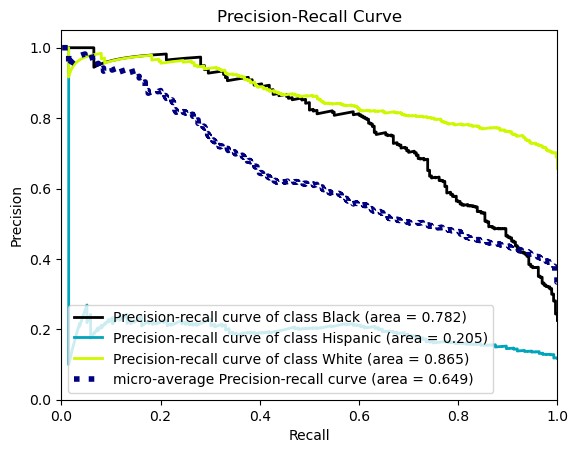

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth=2,
                                                     n_estimators=400,
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.20462665143187145

In [ ]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

NameError: name 'y_test' is not defined

Signature: matthews_corrcoef(y_true, y_pred, *, sample_weight=None)
Docstring:
Compute the Matthews correlation coefficient (MCC).

The Matthews correlation coefficient is used in machine learning as a
measure of the quality of binary and multiclass classifications. It takes
into account true and false positives and negatives and is generally
regarded as a balanced measure which can be used even if the classes are of
very different sizes. The MCC is in essence a correlation coefficient value
between -1 and +1. A coefficient of +1 represents a perfect prediction, 0
an average random prediction and -1 an inverse prediction.  The statistic
is also known as the phi coefficient. [source: Wikipedia]

Binary and multiclass labels are supported.  Only in the binary case does
this relate to information about true and false positives and negatives.
See references below.

Read more in the :ref:`User Guide <matthews_corrcoef>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    G

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___